# 로지스틱 회귀

In [52]:
import pandas as pd
fish = pd.read_csv("fish.csv")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [51]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']]
fish_target = fish['Species']

In [35]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target = train_test_split(fish_input,fish_target,random_state=42)
print(train_input)

     Weight  Length  Diagonal   Height   Width
26    720.0    35.0      40.6  16.3618  6.0900
137   500.0    45.0      48.0   6.9600  4.8960
146     7.5    10.5      11.6   1.9720  1.1600
90    110.0    22.0      23.5   5.5225  3.9950
66    140.0    20.7      23.2   8.5376  3.2944
..      ...     ...       ...      ...     ...
71    300.0    26.0      29.0  11.3680  4.2340
106   250.0    28.0      29.4   7.8204  4.2042
14    600.0    32.0      37.2  14.9544  5.1708
92    150.0    22.5      24.0   6.7920  3.6240
102   300.0    27.3      28.7   8.3230  5.1373

[119 rows x 5 columns]


### 표준화 전처리

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

[[ 9.19657820e-01  6.09431747e-01  8.10412209e-01  1.85194896e+00
   1.00075672e+00]
 [ 3.00412188e-01  1.54653445e+00  1.45316551e+00 -4.69816625e-01
   2.72917446e-01]
 [-1.08585360e+00 -1.68646987e+00 -1.70848587e+00 -1.70159849e+00
  -2.00447580e+00]
 [-7.97341433e-01 -6.08801762e-01 -6.74869070e-01 -8.24805885e-01
  -2.76314705e-01]
 [-7.12898847e-01 -7.30625113e-01 -7.00926637e-01 -8.02298036e-02
  -7.03386897e-01]
 [-9.12746301e-01 -9.64900787e-01 -9.52816444e-01 -8.80171862e-01
  -9.91535662e-01]
 [-7.97341433e-01 -7.02512032e-01 -7.61727625e-01 -7.82824547e-01
  -5.44530184e-01]
 [ 6.38182533e-01  5.62576612e-01  7.32239510e-01  1.64473401e+00
   5.07057367e-01]
 [-7.41046376e-01 -6.74398951e-01 -7.35670058e-01 -6.12059278e-01
  -5.57331377e-01]
 [-8.67710255e-01 -7.96222301e-01 -8.92015456e-01 -9.33586942e-01
  -1.02183182e+00]
 [ 8.21141469e-01  7.49997152e-01  6.71438522e-01  4.98470601e-01
   1.47257213e+00]
 [ 3.00412188e-01  2.34590667e-01  4.28234570e-01  1.36042157e+00

In [6]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

0.8907563025210085
0.85


In [7]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [8]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


#### predict_proba
- scikit-learn의 분류모델에서 제공되는 메서드로, 입력 데이터가 각 클래스에 속할 확률을 반환한다.
- 예측된 클래스(레이블)만 반환하는 predict 와 달리, 각 클래스별 확률 분포를 반환한다.

In [9]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
proba_rounded = np.round(proba,decimals=4)

# pandas 로 결합
df_proba = pd.DataFrame(proba_rounded, columns=kn.classes_)
df_proba

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0.0,0.0,1.0000,0.0,0.0000,0.0,0.0
1,0.0,0.0,0.0000,0.0,0.0000,1.0,0.0
2,0.0,0.0,0.0000,1.0,0.0000,0.0,0.0
3,0.0,0.0,0.6667,0.0,0.3333,0.0,0.0
4,0.0,0.0,0.6667,0.0,0.3333,0.0,0.0


In [10]:
distances,indexes = kn.kneighbors(test_scaled[3:4])
print(indexes)
print(train_target.iloc[indexes[0]])

[[104 115 106]]
52     Roach
106    Perch
103    Perch
Name: Species, dtype: object


## 로지스틱 회귀
이름은 회귀이지만 엄밀히 분류 모델이다.<br>
이 알고리즘은 선형 회귀와 동일하게 선형 방정식을 학습한다.
$$ z = β0+β1⋅weight+β2⋅length+β3⋅diagonal+β4⋅height+β5⋅width $$


## 시그모이드 함수
$$ p = \frac{1}{1 + e^{-z}} $$

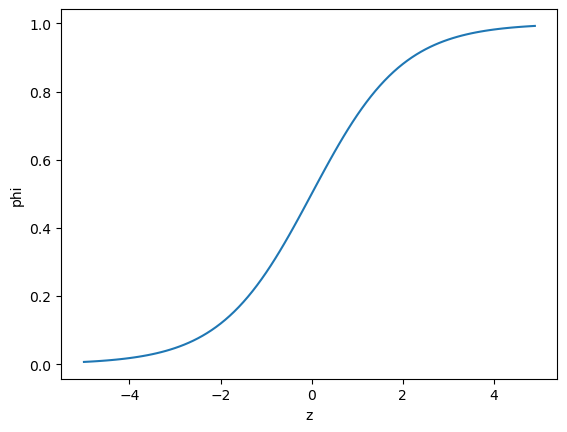

In [11]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

## 로지스틱 회귀로 이진 분류 수행하기

In [12]:
char_arr = np.array(['A','B','C','D','E'])
# 넘파이 배열은 True, False값을 전달하여 행을 선택할수 있음.-> 불리언 인덱싱
print(char_arr[[True,False,True,False,False]])

['A' 'C']


In [13]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)

LogisticRegression()

In [15]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [16]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [17]:
print(lr.classes_)

['Bream' 'Smelt']


### 로지스틱 회귀가 학습한 계수 확인

In [18]:
print(lr.coef_,lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


### 로지스틱 회귀 모델로 z값 계산

In [19]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [20]:
import numpy as np
import matplotlib.pyplot as plt
z = np.array([-6.02991358 , 3.57043428 ,-5.26630496, -4.24382314, -6.06135688])
phi = 1 / (1 + np.exp(-z))
print(phi)

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [21]:
# scipy 의 시그모이드 함수를 이용
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


## 로지스틱 회귀로 다중 분류 수행

In [64]:
lr = LogisticRegression(C=20,max_iter=1000) # 로지스틱회귀에선 C가 규제이며, C가 커질수록 규제가 완화됨.
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.925


In [65]:
print(lr.predict(test_scaled[:6]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch' 'Bream']


In [66]:
proba = lr.predict_proba(test_scaled[:6])
pd.DataFrame(np.round(proba,decimals=3),columns=lr.classes_)

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0.000,0.014,0.841,0.000,0.136,0.007,0.003
1,0.000,0.003,0.044,0.000,0.007,0.946,0.000
2,0.000,0.000,0.034,0.935,0.015,0.016,0.000
3,0.011,0.034,0.306,0.007,0.567,0.000,0.076
4,0.000,0.000,0.904,0.002,0.089,0.002,0.001
5,0.999,0.000,0.000,0.000,0.000,0.000,0.000


In [67]:
print(lr.coef_)
print(lr.coef_.shape) # 7,5가 나옴.
# 7개의 class 분류 클래스가 존재하고 5개의 특성이 있음.

[[-1.49002404 -1.02914631  2.59347024  7.70356861 -1.20069595]
 [ 0.19618445 -2.01066207 -3.77978463  6.50491065 -1.99483775]
 [ 3.5627943   6.3435833  -8.48971771 -5.75757077  3.79307833]
 [-0.10458084  3.60318686  3.93067707 -3.61735028 -1.75069846]
 [-1.40060927 -6.07503937  5.25968928 -0.87220881  1.86043581]
 [-1.38526651  1.49215391  1.39226832 -5.67733676 -4.40097046]
 [ 0.62150191 -2.32407633 -0.90660257  1.71598736  3.69368848]]
(7, 5)


In [61]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision,decimals=4))

[[-5.1392  0.943   4.3757 -2.542   2.9916  0.3082 -0.9374]
 [-8.676   1.893   4.111  -2.4866  2.5461  6.699  -4.0864]
 [-3.2861 -4.8087  2.7876  5.4873  2.3313  0.327  -2.8384]
 [-0.422   0.2869  2.6003 -0.9761  2.775  -5.0561  0.792 ]
 [-4.9868 -1.5292  4.9589 -0.2471  3.1244 -0.5871 -0.733 ]]


### 다중회귀에선 소프트맥스
이진분류에선 z를 구하기 위해 시그모이드 함수를 이용하였지만, 다중분류에선 소프트맥스 함수를 사용한다.

In [27]:
from scipy.special import softmax
proba = softmax(decision,axis=1)
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
